In [189]:
%matplotlib inline

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


In [191]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [192]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [193]:
combined_data = pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID", "Mouse ID"])
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [194]:
# Checking the number of mice.
number_of_mice =len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [195]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
duplicate_mice
 #get the duplicate mouse ID
duplicate_ID = combined_data.loc[duplicate_mice,"Mouse ID"].unique()
duplicate_ID


array(['g989'], dtype=object)

In [196]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ID = combined_data.loc[combined_data["Mouse ID"]== duplicate_ID[0]]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [197]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined_data.loc[combined_data["Mouse ID"] != duplicate_ID[0]]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [198]:
# Checking the number of mice in the clean DataFrame.
mice_count =len(df["Mouse ID"].value_counts())
mice_count

248

# Summary Statistics

In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_mean = df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
stat_median = df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
stat_var = df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stat_sd = df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stat_sem = df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = {"Mean Tumor Volume":stat_mean,
            "Median Tumor Volume":stat_median,
            "Tumor Volume Variance":stat_var,
            "Tumor Volume Std. Dev.":stat_sd,
            "Tumor Voulme Std. Err.":stat_sem}
summary_df = pd.DataFrame(summary)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Voulme Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [200]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
test_df = df.groupby(["Drug Regimen"]).count()["Timepoint"]
test_df
sorted_df=test_df.sort_values(ascending=False)
sorted_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

In [202]:
# Set x axis and tick locations
x_axis = np.arange(len(test_df))
tick_locations = [value for value in x_axis]

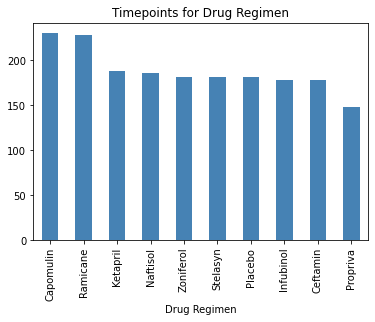

<Figure size 432x288 with 0 Axes>

In [203]:
# Create a bar chart based upon the above data
test_chart=sorted_df.plot(kind="bar", facecolor="steelblue",
                     title="Timepoints for Drug Regimen")
test_chart.set_xlabel = "Drug Regimen"
test_chart.set_ylabel = "Number of mice tested"

plt.show()
plt.tight_layout()

In [204]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#dataset
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
timepoint = [230,228,188,186,182,181,181,178,178,148]

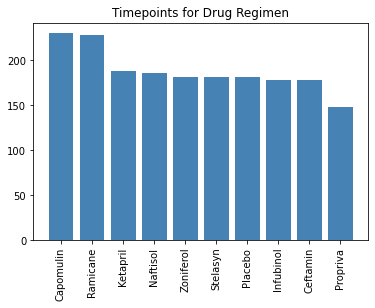

In [205]:
x_axis = np.arange(0,len(drugs))
plt.title("Timepoints for Drug Regimen")
plt.bar(x_axis,timepoint, color='steelblue', alpha=1, align="center")
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs,rotation="vertical")
plt.show()

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = df.groupby("Sex").count()["Mouse ID"]
gender_df = gender_df.sort_values(ascending=False)
gender_df

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

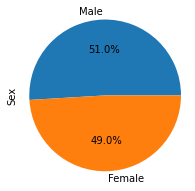

In [207]:
gender_chart = gender_df.plot(kind="pie",autopct ="%1.1f%%",figsize=(3,3))
gender_chart.set_ylabel("Sex")
plt.axis("equal")
plt.show()

In [208]:
# Labels for the sections of our pie chart
labels = ["Male","Female"]
# The values of each section of the pie chart
sizes = [958,922]
# count = df.groupby("Sex").count()["Mouse ID"].tolist()
# count
# The colors of each section of the pie chart
colors = ["steelblue","darkorange"]

<Figure size 216x216 with 0 Axes>

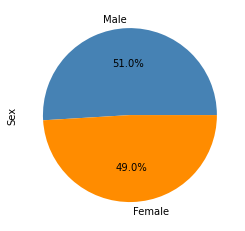

In [209]:
fig = plt.figure(figsize =(3,3))
# gender_chart= plt.pie(sizes, labels=labels, colors=colors,
#                autopct="%1.1f%%")
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
ax.set_ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [210]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_vol= df.groupby(["Mouse ID","Drug Regimen"]).last()[["Timepoint","Tumor Volume (mm3)"]]
max_tumor_df= max_tumor_vol.reset_index()
max_tumor_df

# merged_tumor_df = pd.merge(max_tumor_df,df,how="outer",on=("Mouse ID"))
# merged_tumor_df.head(30)


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_list=list(drugs)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for value in drugs:
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_tumor_df.loc[max_tumor_df['Drug Regimen'] == value, 'Tumor Volume (mm3)']
    # add subset 
    tumor_volume.append(final_tumor_vol) 
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr    = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{value}")
    print(f"Tumor Volume for {value} below {round(lower_bound)} could be outliers.")
    print(f"Tumor Volume for {value} above {round(upper_bound)} could be outliers.")
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    print(f"{value}'s potential outliers:  {round(outliers)}")
    print(f"Number of outliers for {value} is {outliers.count()}")    

Capomulin
Tumor Volume for Capomulin below 21.0 could be outliers.
Tumor Volume for Capomulin above 52.0 could be outliers.
Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of outliers for Capomulin is 0
Ramicane
Tumor Volume for Ramicane below 18.0 could be outliers.
Tumor Volume for Ramicane above 54.0 could be outliers.
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of outliers for Ramicane is 0
Infubinol
Tumor Volume for Infubinol below 37.0 could be outliers.
Tumor Volume for Infubinol above 83.0 could be outliers.
Infubinol's potential outliers:  31    36.0
Name: Tumor Volume (mm3), dtype: float64
Number of outliers for Infubinol is 1
Ceftamin
Tumor Volume for Ceftamin below 25.0 could be outliers.
Tumor Volume for Ceftamin above 88.0 could be outliers.
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of outliers for Ceftamin is 0


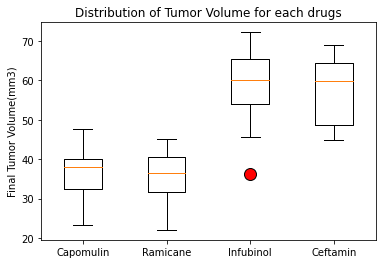

In [212]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# tumor_volume = final_tumor_vol
fig1,ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
ax1.boxplot(tumor_volume,labels=drug_list,flierprops=flierprops)
ax1.set_title('Distribution of Tumor Volume for each drugs')
ax1.set_ylabel('Final Tumor Volume(mm3)')
plt.show()

In [213]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
line_df = line_df.loc[line_df["Mouse ID"]== "l509"]
line_df.reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,231,l509,0,45.000000,Capomulin
1,253,l509,5,45.851193,Capomulin
2,539,l509,10,46.759074,Capomulin
3,881,l509,15,47.488599,Capomulin
4,982,l509,20,48.070452,Capomulin
5,1146,l509,25,44.006257,Capomulin
6,1414,l509,30,44.708055,Capomulin
7,1499,l509,35,40.207289,Capomulin
8,1723,l509,40,40.770813,Capomulin
9,1771,l509,45,41.483008,Capomulin


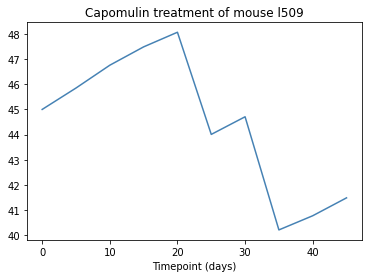

In [214]:
x_axis = np.arange(0,50,5)
tumor_plot,=plt.plot(x_axis,line_df["Tumor Volume (mm3)"], color="steelblue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel()
# plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = df.groupby(["Drug Regimen","Mouse ID"]).mean()[["Tumor Volume (mm3)","Weight (g)"]]
scatter_df.head(28)

Tumor Volume (mm3)  Weight (g)
Drug Regimen Mouse ID                                
Capomulin    b128               41.963636        22.0
             b742               40.083699        21.0
             f966               36.505973        17.0
             g288               41.990097        19.0
             g316               44.613344        22.0
             i557               44.805810        24.0
             i738               39.141053        20.0
             j119               44.465236        23.0
             j246               43.216925        21.0
             l509               44.434474        21.0
             l897               42.507261        19.0
             m601               34.847470        17.0
             m957               39.049816        19.0
             r157               45.798970        25.0
             r554               36.509212        17.0
             r944               43.367364        25.0
             s185               34.559143        17.0
             s710               42.803733        23.0
             t565               39.328725        17.0
             u364               39.887495        17.0
             v923               41.581595        21.0
             w150               41.384825        23.0
             w914               41.352452        21.0
             x401               36.182040        15.0
             y793               38.506829        17.0
Ceftamin     a275               52.770965        28.0
             b447               45.000000        30.0
             b487               50.007839        28.0

In [216]:
regimen = "Capomulin"

specific_regimen = scatter_df.loc[regimen]
specific_regimen.reset_index()


,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


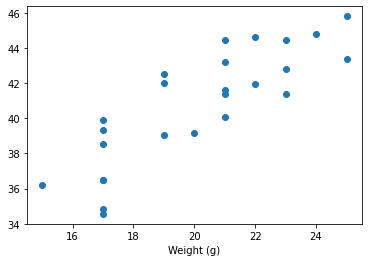

In [219]:
plt.scatter(specific_regimen["Weight (g)"],specific_regimen["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


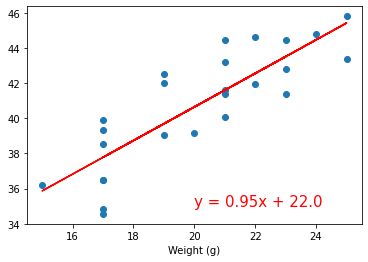

In [220]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Correlation
correlation = st.pearsonr(specific_regimen["Weight (g)"],specific_regimen["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Linear Regression
x_values = specific_regimen["Weight (g)"]
y_values = specific_regimen["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(20,35),fontsize=15,color="red") 
plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")
plt.show()
